Tablas:

Conectar Google Drive:

In [ ]:
# Conectar Google Drive en Colab
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### Python : Librerias ( Extensiones)

![Librerias](https://github.com/karinakozlowski/Notebooks/raw/main/Imagenyoutube/librerias.png)

#### TOP 3 LIBRERIAS DATA SCIENCE


![Librerias](https://github.com/karinakozlowski/Notebooks/raw/main/Imagenyoutube/1.png)

### Instalar e  Importar una Libreria

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

![Librerias](https://github.com/karinakozlowski/Notebooks/raw/main/Imagenyoutube/Captura%20de%20pantalla%202024-10-13%20163540.png)


### Crear una VARIABLE y cargar un EXCEL y TXT

In [ ]:
# Cargar los datos de finanzas y tipo de cambio
df_finanzas = pd.read_excel('/content/drive/My Drive/finanzas_real.xlsx')
df_tipo_cambio = pd.read_csv('/content/drive/My Drive/paises_tipo_cambio.txt', sep='\t')

### IMPRIMIR NUESTRA TABLA DE EXCEL

Ahora es una tabla de python y se puede combinar con cualquier tipo de archivo

In [ ]:
df_finanzas.head()

,pais,moneda,periodo_fiscal,codigo_pedido,linea_producto,dia,ganancia,facturacion,margen,costos
0,Suiza,CHF,2024 Q1,P468,Clothing,2024-07-15,7884.391202,18299,0.43,10414.608798
1,Suiza,CHF,2024 Q2,P434,Automotive,2024-09-17,11060.448070,24081,0.46,13020.551930
2,Suiza,CHF,2024 Q3,P887,Automotive,2024-10-16,12868.600953,32056,0.40,19187.399047
3,Suiza,CHF,2024 Q4,P898,Electronics,2024-07-14,22854.247671,40670,0.56,17815.752329
4,Alemania,EUR,2024 Q1,P775,Clothing,2024-09-14,9495.104850,19975,0.48,10479.895150


### IMPRIMIR NUESTRA TABLA en FORMATO TXT

Ahora es una tabla de python y se puede combinar con el archivo que importamos de Excel

In [ ]:
df_tipo_cambio.head()

,moneda,periodo_fiscal,tipo_cambio
0,CHF,2024 Q1,0.97
1,CHF,2024 Q2,1.46
2,CHF,2024 Q3,1.15
3,CHF,2024 Q4,0.95
4,EUR,2024 Q1,1.13


![Librerias](https://github.com/karinakozlowski/Notebooks/raw/main/Imagenyoutube/union.png)

Metodologia de unir tablas : https://sam.webspace.tw/2019/07/11/SQL-JOIN/

### COMBINAMOS NUESTRAS DOS TABLAS

In [ ]:
# Unir las tablas en base a la columna de "moneda" y "periodo_fiscal"
df_combined = pd.merge(df_finanzas, df_tipo_cambio, on=['moneda', 'periodo_fiscal'], how='left')

### IMPRIMIMOS LA UNION DE LAS DOS TABLAS

In [ ]:
df_combined.head()

,pais,moneda,periodo_fiscal,codigo_pedido,linea_producto,dia,ganancia,facturacion,margen,costos,tipo_cambio
0,Suiza,CHF,2024 Q1,P468,Clothing,2024-07-15,7884.391202,18299,0.43,10414.608798,0.97
1,Suiza,CHF,2024 Q2,P434,Automotive,2024-09-17,11060.448070,24081,0.46,13020.551930,1.46
2,Suiza,CHF,2024 Q3,P887,Automotive,2024-10-16,12868.600953,32056,0.40,19187.399047,1.15
3,Suiza,CHF,2024 Q4,P898,Electronics,2024-07-14,22854.247671,40670,0.56,17815.752329,0.95
4,Alemania,EUR,2024 Q1,P775,Clothing,2024-09-14,9495.104850,19975,0.48,10479.895150,1.13


### EXPLORAMOS SU CONTENIDO

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pais            12 non-null     object 
 1   moneda          12 non-null     object 
 2   periodo_fiscal  12 non-null     object 
 3   codigo_pedido   12 non-null     object 
 4   linea_producto  12 non-null     object 
 5   dia             12 non-null     object 
 6   ganancia        12 non-null     float64
 7   facturacion     12 non-null     int64  
 8   margen          12 non-null     float64
 9   costos          12 non-null     float64
 10  tipo_cambio     12 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.2+ KB


### LIMPIEZA DEL DATASET COMBINADO

In [ ]:
# Limpiar los datos eliminando nulos y duplicados
df_combined.dropna(inplace=True)
df_combined.drop_duplicates(inplace=True)


### Agrupar por periodo fiscal y pais para obtener estadísticas de facturación y ganancia

![For Loop Image](https://github.com/karinakozlowski/Notebooks/raw/main/groupby2.png)

In [ ]:
# Agrupar por periodo fiscal y pais para obtener estadísticas de facturación y ganancia
df_grouped = df_combined.groupby(['periodo_fiscal', 'pais']).agg({
    'facturacion': ['sum', 'mean', 'max'],
    'ganancia': ['sum', 'mean', 'max']
}).reset_index()

#### RENOMBRAR NOMBRES DE COLUMNAS

In [ ]:
# Renombrar columnas para mayor claridad
df_grouped.columns = ['periodo_fiscal', 'pais', 'facturacion_total', 'facturacion_media', 'facturacion_max',
                      'ganancia_total', 'ganancia_media', 'ganancia_max']

### VISULIZAR CON GRAFICOS NUESTRA DATA

![For Loop Image](https://github.com/karinakozlowski/Notebooks/raw/main/Imagenyoutube/graficos.jpg)

<Axes: xlabel='periodo_fiscal', ylabel='facturacion_total'>

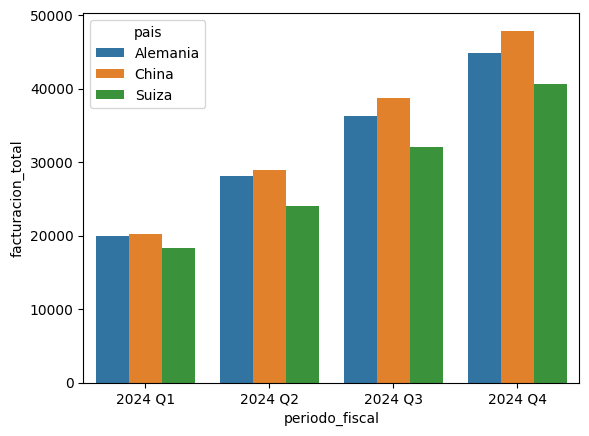

In [ ]:
sns.barplot(data=df_grouped, x='periodo_fiscal', y='facturacion_total', hue='pais')

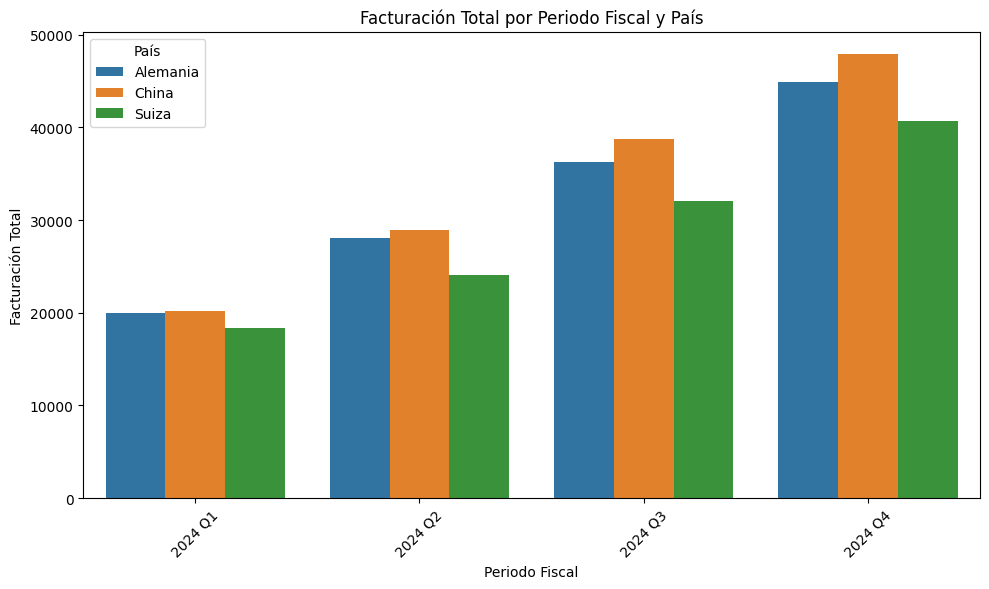

In [ ]:
# Visualización de datos
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='periodo_fiscal', y='facturacion_total', hue='pais')
plt.title('Facturación Total por Periodo Fiscal y País')
plt.xticks(rotation=45)
plt.ylabel('Facturación Total')
plt.xlabel('Periodo Fiscal')
plt.legend(title='País')
plt.tight_layout()
plt.show()


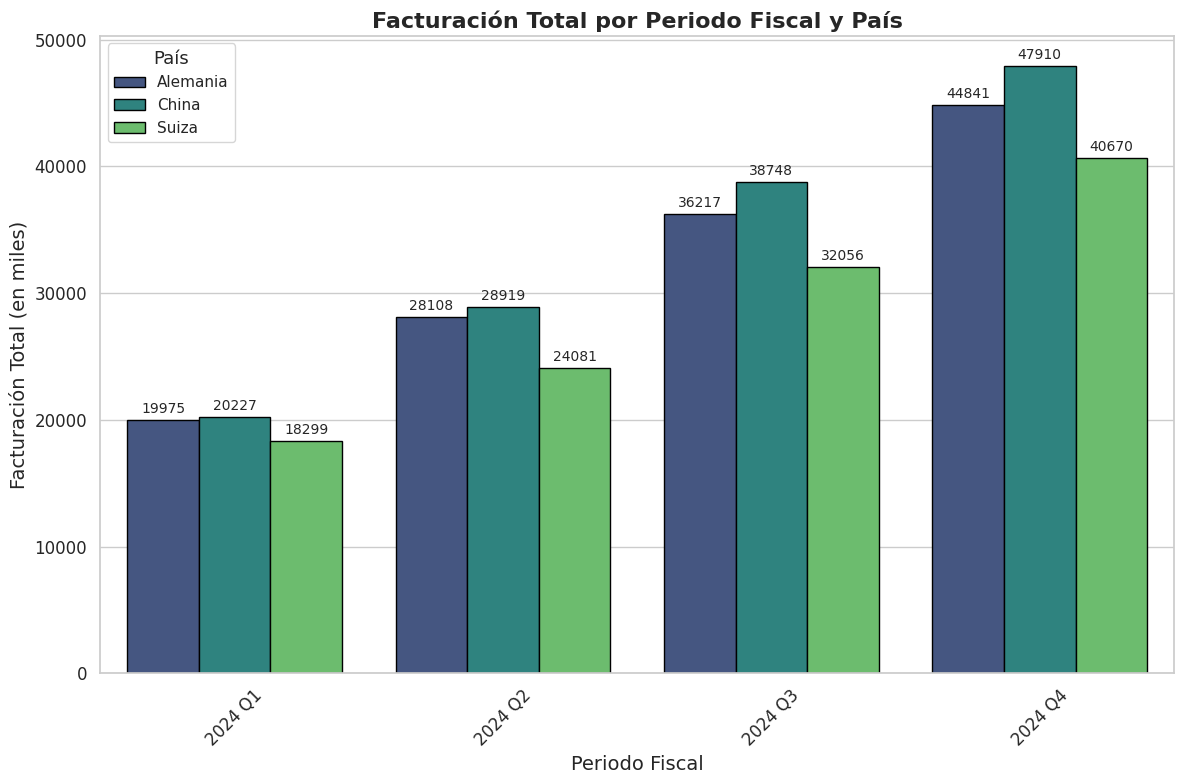

In [ ]:
# Visualización de datos mejorada
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")  # Cambiar el tema a "whitegrid" para una apariencia limpia

# Crear el gráfico
sns.barplot(
    data=df_grouped,
    x='periodo_fiscal',
    y='facturacion_total',
    hue='pais',
    palette='viridis',  # Usar una paleta de colores que sea agradable y distintiva
    edgecolor='black'   # Añadir bordes negros a las barras para mejorar el contraste
)

# Títulos y etiquetas
plt.title('Facturación Total por Periodo Fiscal y País', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Facturación Total (en miles)', fontsize=14)
plt.xlabel('Periodo Fiscal', fontsize=14)
plt.legend(title='País', title_fontsize='13', fontsize='11', loc='upper left')

# Añadir valores encima de las barras para resaltar la facturación total
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

<Axes: xlabel='periodo_fiscal', ylabel='ganancia_media'>

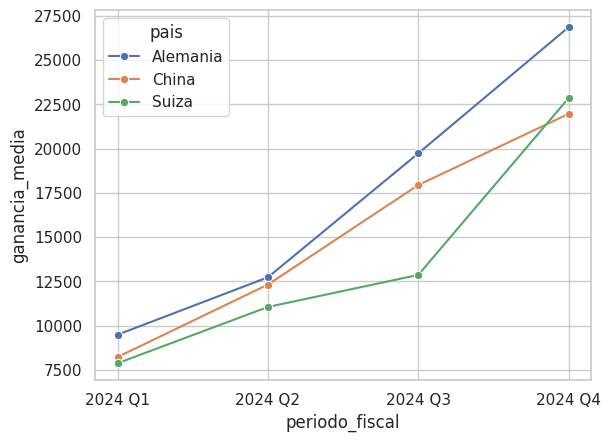

In [ ]:
sns.lineplot(data=df_grouped, x='periodo_fiscal', y='ganancia_media', hue='pais', marker='o')

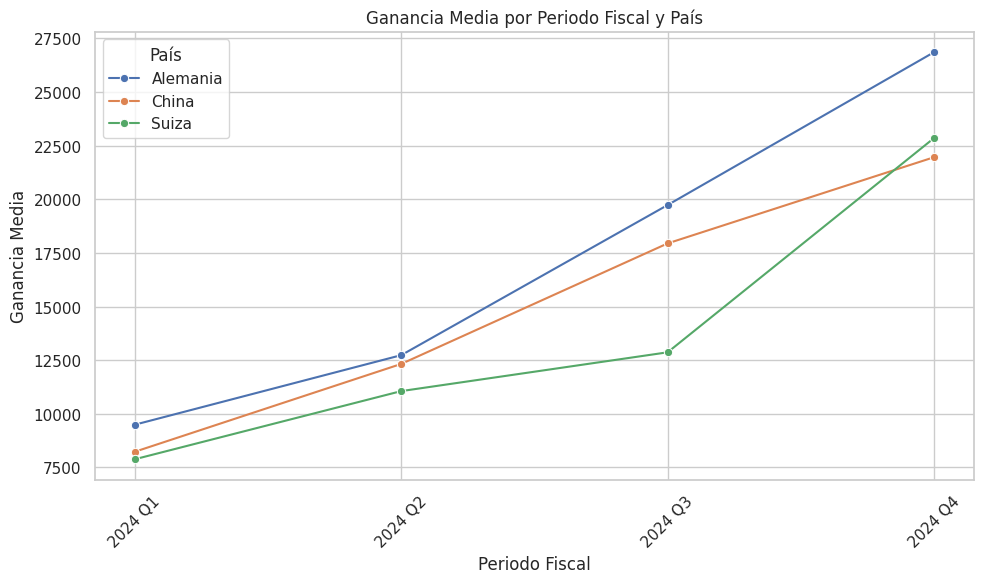

In [ ]:
# Crear una visualización de margen de ganancia media por país y periodo fiscal
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='periodo_fiscal', y='ganancia_media', hue='pais', marker='o')
plt.title('Ganancia Media por Periodo Fiscal y País')
plt.xticks(rotation=45)
plt.ylabel('Ganancia Media')
plt.xlabel('Periodo Fiscal')
plt.legend(title='País')
plt.tight_layout()
plt.show()

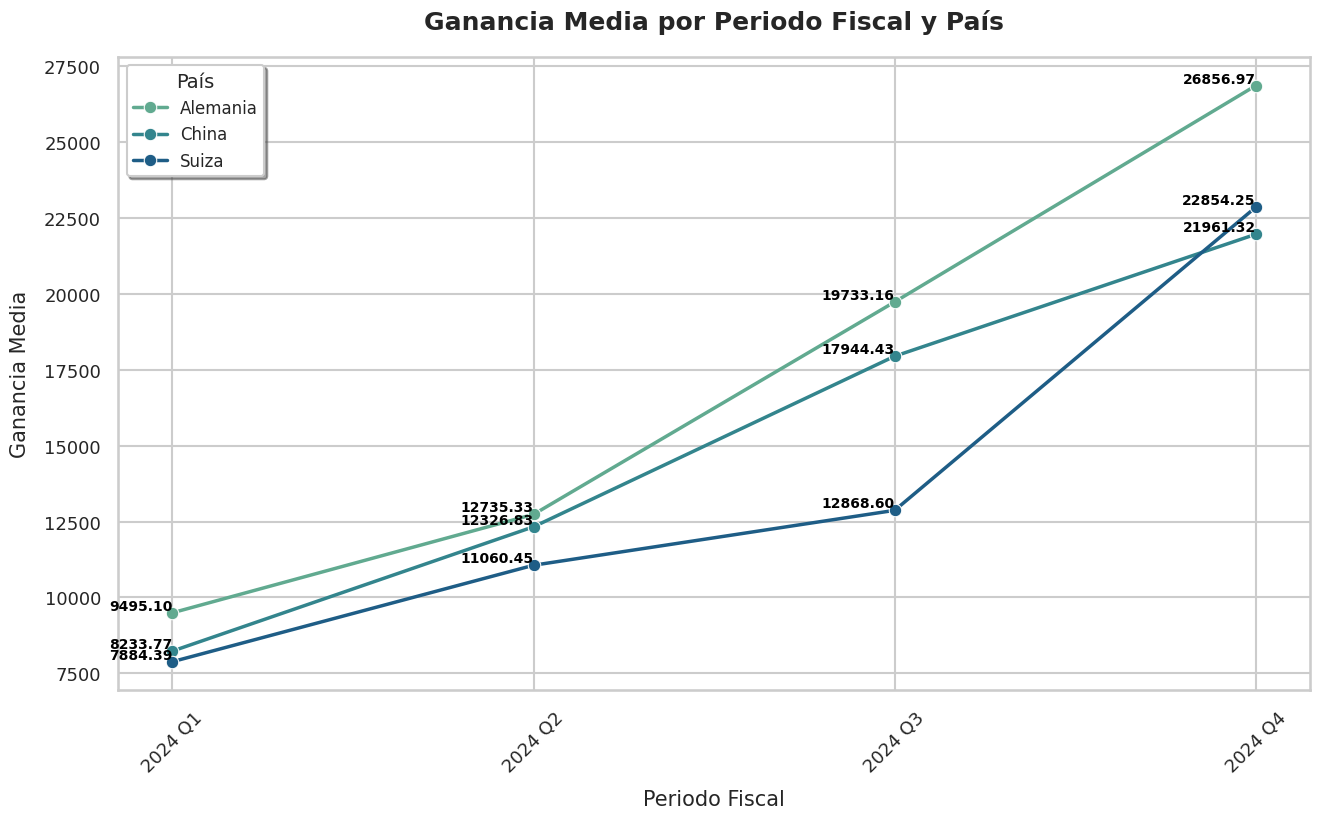

In [ ]:
# Crear una visualización mejorada de margen de ganancia media por país y periodo fiscal
plt.figure(figsize=(14, 9))
sns.set_theme(style="whitegrid", context="talk")  # Cambiar el tema a "whitegrid" con contexto "talk" para una apariencia más profesional y legible

# Crear el gráfico
sns.lineplot(
    data=df_grouped,
    x='periodo_fiscal',
    y='ganancia_media',
    hue='pais',
    marker='o',
    palette='crest',  # Usar una paleta de colores suave y atractiva
    linewidth=2.5  # Aumentar el grosor de las líneas para mejorar la visibilidad
)

# Títulos y etiquetas
plt.title('Ganancia Media por Periodo Fiscal y País', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Ganancia Media', fontsize=15, labelpad=10)
plt.xlabel('Periodo Fiscal', fontsize=15, labelpad=10)
plt.legend(title='País', title_fontsize='14', fontsize='12', loc='upper left', frameon=True, shadow=True)  # Añadir sombra al recuadro de la leyenda para darle un aspecto más destacado

# Añadir valores encima de los puntos para resaltar la ganancia media
for line in plt.gca().lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{y:.2f}', fontsize=10, ha='right', va='bottom', color='black', fontweight='bold')  # Añadir etiquetas a los puntos

# Ajustar los márgenes para evitar solapamiento
plt.tight_layout(pad=2)
plt.show()

### PROBABILIDAD

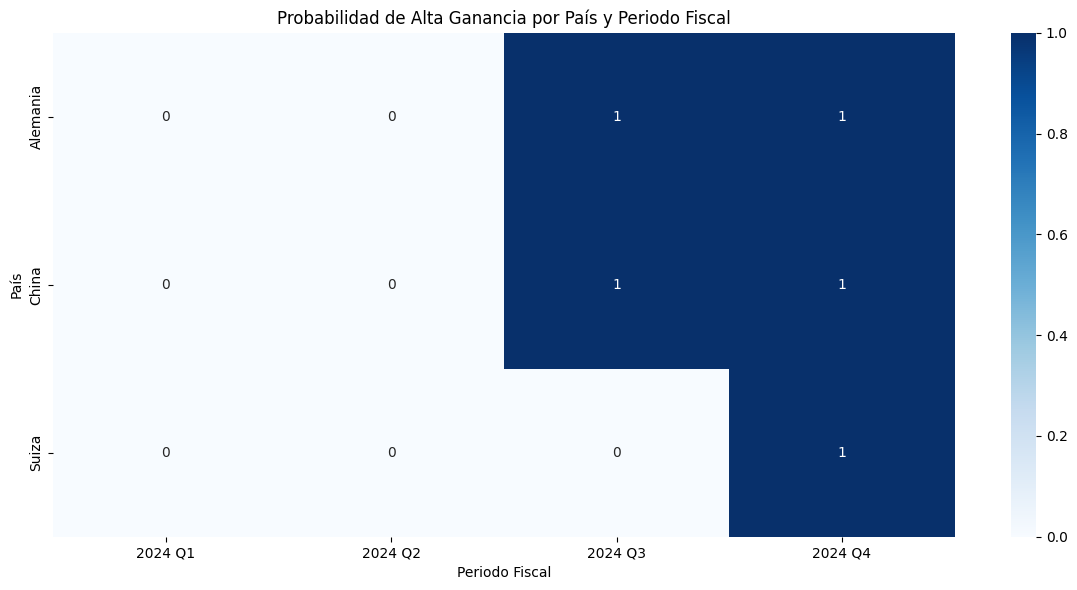

In [ ]:
# Predicción de probabilidad: Estimando la probabilidad de una ganancia mayor al promedio global por periodo fiscal y país
global_avg_ganancia = df_combined['ganancia'].mean()
df_combined['high_ganancia'] = np.where(df_combined['ganancia'] > global_avg_ganancia, 1, 0)

# Agrupar para ver la probabilidad de "high_ganancia" por periodo fiscal y país
probabilidad_ganancia = df_combined.groupby(['periodo_fiscal', 'pais'])['high_ganancia'].mean().reset_index()

# Visualización de probabilidad de alta ganancia
plt.figure(figsize=(12, 6))
pivot_data = probabilidad_ganancia.pivot(index='pais', columns='periodo_fiscal', values='high_ganancia')
sns.heatmap(pivot_data, annot=True, cmap='Blues')
plt.title('Probabilidad de Alta Ganancia por País y Periodo Fiscal')
plt.ylabel('País')
plt.xlabel('Periodo Fiscal')
plt.tight_layout()
plt.show()

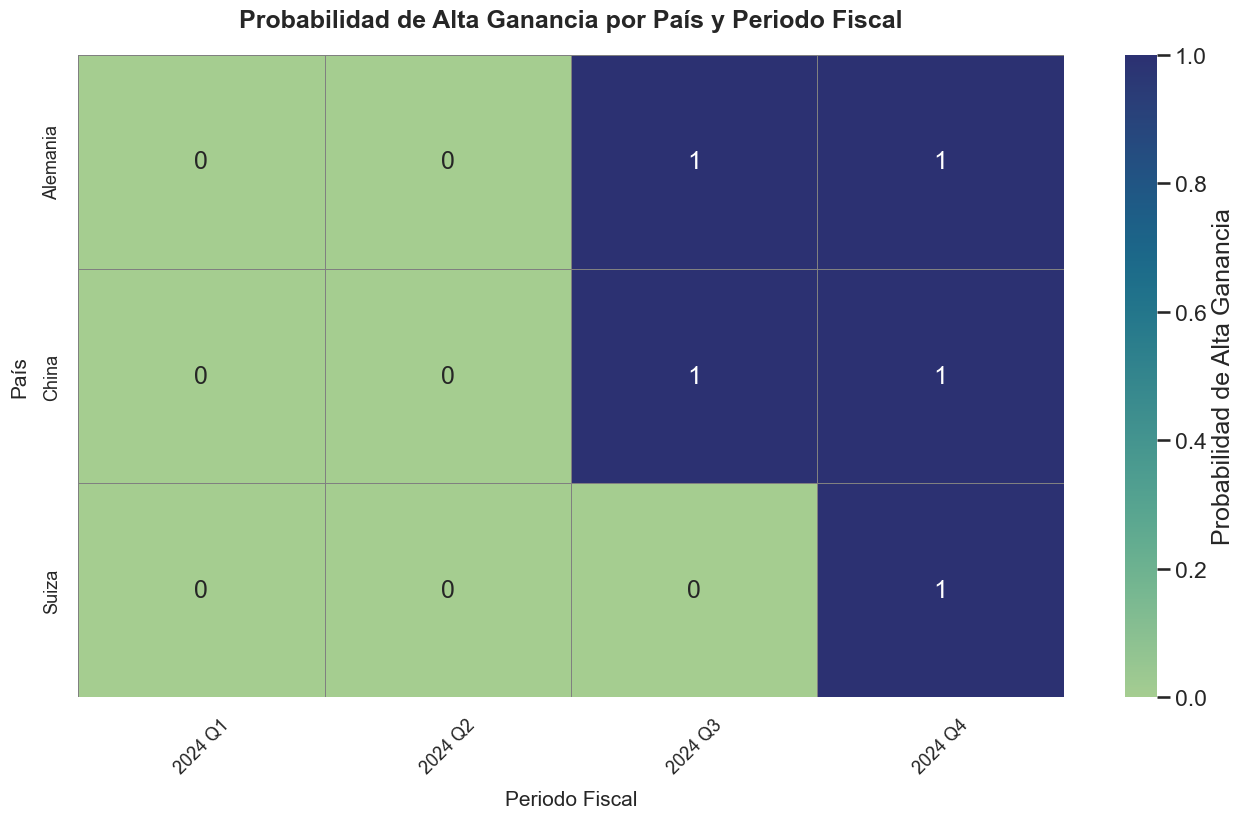

In [ ]:
# Predicción de probabilidad: Estimando la probabilidad de una ganancia mayor al promedio global por periodo fiscal y país
global_avg_ganancia = df_combined['ganancia'].mean()
df_combined['high_ganancia'] = np.where(df_combined['ganancia'] > global_avg_ganancia, 1, 0)

# Agrupar para ver la probabilidad de "high_ganancia" por periodo fiscal y país
probabilidad_ganancia = df_combined.groupby(['periodo_fiscal', 'pais'])['high_ganancia'].mean().reset_index()

# Visualización de probabilidad de alta ganancia mejorada
plt.figure(figsize=(14, 9))
sns.set_theme(style="whitegrid", context="talk")  # Cambiar el tema a "whitegrid" con contexto "talk" para una apariencia más profesional y legible

# Crear el gráfico
pivot_data = probabilidad_ganancia.pivot(index='pais', columns='periodo_fiscal', values='high_ganancia')
sns.heatmap(
    pivot_data,
    annot=True,
    cmap='crest',  # Usar una paleta de colores suave y atractiva
    linewidths=0.5,  # Añadir separadores entre celdas
    linecolor='gray',  # Color de los separadores
    cbar_kws={'label': 'Probabilidad de Alta Ganancia'}  # Añadir una etiqueta al color bar
)

# Títulos y etiquetas
plt.title('Probabilidad de Alta Ganancia por País y Periodo Fiscal', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('País', fontsize=15, labelpad=10)
plt.xlabel('Periodo Fiscal', fontsize=15, labelpad=10)

# Ajustar los márgenes para evitar solapamiento
plt.tight_layout(pad=2)
plt.show()

In [ ]:
# Crear DataFrame de finanzas reales
paises = ['Suiza', 'Alemania', 'China']
monedas = ['CHF', 'EUR', 'CNY']
periodos_fiscales = [f'2024 Q{i}' for i in range(1, 5)]

# Generar datos de finanzas simulando un comportamiento escalonado
finanzas_data = []
for pais, moneda in zip(paises, monedas):
    crecimiento_base = np.random.randint(10000, 15000)
    facturacion_anterior = crecimiento_base
    for periodo in periodos_fiscales:
        # Aumentar la facturación y costos en cada periodo para simular crecimiento
        facturacion = facturacion_anterior + np.random.randint(5000, 10000)
        costos = facturacion * np.random.uniform(0.4, 0.6)
        ganancia = facturacion - costos
        facturacion_anterior = facturacion

        finanzas_data.append({
            'pais': pais,
            'moneda': moneda,
            'periodo_fiscal': periodo,
            'codigo_pedido': f'P{np.random.randint(100, 999)}',
            'linea_producto': np.random.choice(['Electronics', 'Furniture', 'Clothing', 'Automotive']),
            'dia': f'2024-{np.random.randint(1, 13):02d}-{np.random.randint(1, 28):02d}',
            'ganancia': ganancia,
            'facturacion': facturacion,
            'margen': round(ganancia / facturacion, 2),
            'costos': costos
        })

# Crear DataFrame de finanzas y exportarlo a Excel
df_finanzas = pd.DataFrame(finanzas_data)